# MP1: Regression Analysis for Band Gap Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [2]:
# Step 1: Loading the dataset
dataset_path = "citrination-export-band-gaps.csv"  # Update as needed
data = pd.read_csv(dataset_path)

# Inspecting the dataset
print("Dataset Loaded: ", data.shape)
print("Dataset Columns: ", data.columns)



Dataset Loaded:  (1449, 5)
Dataset Columns:  Index(['formula', 'Property Band gap', 'Property Band gap units',
       'Property Crystallinity', 'Property Color'],
      dtype='object')


In [3]:
# Step 2: Handling missing values
data.dropna(inplace=True)
print("Dataset after dropping missing values: ", data.shape)

# Step 2.5: Cleaning the target column (Property Band gap)
def extract_numeric(value):
    """Extract the numeric part of a value with uncertainty or range annotations."""
    try:
        return float(value.split('$')[0])  # Extract the numeric part before '$'
    except:
        return np.nan  # Return NaN if conversion fails

# Applying the cleaning function to the target column
data['Property Band gap'] = data['Property Band gap'].apply(extract_numeric)

# Droping rows where the target could not be converted
data.dropna(subset=['Property Band gap'], inplace=True)

print("Dataset after cleaning target column:", data.shape)




Dataset after dropping missing values:  (125, 5)
Dataset after cleaning target column: (125, 5)


Cleanning was not necessary!?

In [4]:
# Step 3: Define features (X) and target (y)
X = data.drop(columns=['Property Band gap'])  # we can update the target column name as necessary
y = data['Property Band gap']

# Identifying and handling non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-Numeric Columns:", non_numeric_cols)

# we can drop or encode non-numeric columns
if len(non_numeric_cols) > 0:
    X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

print("Processed Feature Matrix Shape:", X.shape)



Non-Numeric Columns: Index(['formula', 'Property Band gap units', 'Property Crystallinity',
       'Property Color'],
      dtype='object')
Processed Feature Matrix Shape: (125, 92)


In [5]:
# Step 4: splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size: ", X_train.shape)
print("Testing set size: ", X_test.shape)



Training set size:  (100, 92)
Testing set size:  (25, 92)


In [6]:
# Step 5: training and evaluating regression models
# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

from sklearn.preprocessing import StandardScaler

# scaling the target variable
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# finally proceeding with the training and testing steps:))

# Training and evaluating models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    })

# Converting results to dataframe for better visualization
results_df = pd.DataFrame(results)
print("Model Performance:")
print(results_df)



Model Performance:
               Model           MAE           MSE            R2
0  Linear Regression  7.149577e+11  2.001813e+24 -1.303710e+24
1      Random Forest  7.036872e-01  1.545932e+00 -6.810913e-03
2  Gradient Boosting  7.201147e-01  1.445315e+00  5.871741e-02


In [7]:
# Step 6: Saving results to a CSV file
results_df.to_csv("model_performance_band_gaps.csv", index=False)
print("Model performance saved to model_performance_band_gaps.csv")


Model performance saved to model_performance_band_gaps.csv


In [8]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Step 1: Load the dataset
dataset_path = "citrination-export-band-gaps.csv"  # Update as needed
data = pd.read_csv(dataset_path)

# Inspecting the dataset
print("Dataset Loaded: ", data.shape)
print("Dataset Columns: ", data.columns)



Dataset Loaded:  (1449, 5)
Dataset Columns:  Index(['formula', 'Property Band gap', 'Property Band gap units',
       'Property Crystallinity', 'Property Color'],
      dtype='object')


In [9]:
# Step 2: Handling the missing values
data.dropna(inplace=True)

# Step 2.5: Cleaing the target column (Property Band gap)
def extract_numeric(value):
    """Extract the numeric part of a value with uncertainty or range annotations."""
    try:
        return float(value.split('$')[0])  # Extract the numeric part before '$'
    except:
        return np.nan  # Return NaN if conversion fails

# apply the cleaning function to the target column
data['Property Band gap'] = data['Property Band gap'].apply(extract_numeric)

# drop rows where the target could not be converted
data.dropna(subset=['Property Band gap'], inplace=True)

print("Dataset after cleaning target column:", data.shape)



Dataset after cleaning target column: (125, 5)


In [10]:
# Step 3: defining features (X) and target (y)
X = data.drop(columns=['Property Band gap'])  # Drop the target column from features
y = data['Property Band gap']

# Identifing and handle non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-Numeric Columns:", non_numeric_cols)

# Drop or encode non-numeric columns
if len(non_numeric_cols) > 0:
    X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

print("Processed Feature Matrix Shape:", X.shape)



Non-Numeric Columns: Index(['formula', 'Property Band gap units', 'Property Crystallinity',
       'Property Color'],
      dtype='object')
Processed Feature Matrix Shape: (125, 92)


In [11]:
# Step 4: Scale the target variable
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()



In [12]:
# Step 5: Dimensionality reduction using PCA
pca = PCA(n_components=20)  # Reduce to 20 principal components
X_reduced = pca.fit_transform(X)
print("Reduced Feature Matrix Shape:", X_reduced.shape)

Reduced Feature Matrix Shape: (125, 20)


In [13]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
print("Training set size: ", X_train.shape)
print("Testing set size: ", X_test.shape)

Training set size:  (100, 20)
Testing set size:  (25, 20)


In [14]:
# Step 7: Train and evaluate regression models
# Initialize models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Model Performance:")
print(results_df)

Model Performance:
               Model       MAE       MSE        R2
0   Ridge Regression  0.481446  0.610105  0.021797
1      Random Forest  0.493006  0.685303 -0.098770
2  Gradient Boosting  0.487410  0.720884 -0.155818


In [15]:
# Step 8: Save results to a CSV file
results_df.to_csv("model_performance_band_gaps_pca.csv", index=False)
print("Model performance saved to model_performance_band_gaps_pca.csv")

Model performance saved to model_performance_band_gaps_pca.csv


In [16]:

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


# Step 1: Load the dataset
dataset_path = "citrination-export-band-gaps.csv"  
data = pd.read_csv(dataset_path)

# Inspect the dataset
print("Dataset Loaded: ", data.shape)
print("Dataset Columns: ", data.columns)


Dataset Loaded:  (1449, 5)
Dataset Columns:  Index(['formula', 'Property Band gap', 'Property Band gap units',
       'Property Crystallinity', 'Property Color'],
      dtype='object')


In [17]:
# Step 2: Handle missing values
data.dropna(inplace=True)

# Step 2.5: Clean the target column (Property Band gap)
def extract_numeric(value):
    """Extract the numeric part of a value with uncertainty or range annotations."""
    try:
        return float(value.split('$')[0])  # Extract the numeric part before '$'
    except:
        return np.nan  # Return NaN if conversion fails

# Apply the cleaning function to the target column
data['Property Band gap'] = data['Property Band gap'].apply(extract_numeric)

# Drop rows where the target could not be converted
data.dropna(subset=['Property Band gap'], inplace=True)

print("Dataset after cleaning target column:", data.shape)

Dataset after cleaning target column: (125, 5)


In [18]:
# Step 3: Define features (X) and target (y)
X = data.drop(columns=['Property Band gap'])  # Drop the target column from features
y = data['Property Band gap']

# Identify and handle non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-Numeric Columns:", non_numeric_cols)

# Drop or encode non-numeric columns
if len(non_numeric_cols) > 0:
    X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

print("Processed Feature Matrix Shape:", X.shape)

Non-Numeric Columns: Index(['formula', 'Property Band gap units', 'Property Crystallinity',
       'Property Color'],
      dtype='object')
Processed Feature Matrix Shape: (125, 92)


In [19]:
# Step 4: Feature Selection Using Correlation Filtering
# Computing correlation between features and the target
correlation = pd.concat([X, y], axis=1).corr()
target_correlation = correlation['Property Band gap'].drop('Property Band gap', errors='ignore')

# Retain features with |correlation| > threshold
threshold = 0.2
selected_features = target_correlation[abs(target_correlation) > threshold].index
X_selected = X[selected_features]

print("Selected Features Shape:", X_selected.shape)
print("Selected Features:", selected_features)

Selected Features Shape: (125, 10)
Selected Features: Index(['formula_AlN', 'formula_BN', 'formula_CaO', 'formula_InAs',
       'formula_PbTe', 'formula_Sn',
       'Property Crystallinity_Single crystalline', 'Property Color_Dark Gray',
       'Property Color_Gray', 'Property Color_White'],
      dtype='object')


In [20]:
# Step 5: Scaling the target variable
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [21]:
# Step 6: Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print("Training set size: ", X_train.shape)
print("Testing set size: ", X_test.shape)

Training set size:  (100, 10)
Testing set size:  (25, 10)


In [22]:
# Step 7: Train and evaluate regression models
# Initialize models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    })

# Converting the results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Model Performance:")
print(results_df)

Model Performance:
               Model       MAE       MSE        R2
0   Ridge Regression  0.511241  0.643070 -0.031056
1      Random Forest  0.522967  0.677766 -0.086686
2  Gradient Boosting  0.516851  0.674729 -0.081817


In [23]:
# Step 8: Saving results to a CSV file
results_df.to_csv("model_performance_band_gaps_filtered.csv", index=False)
print("Model performance saved to model_performance_band_gaps_filtered.csv")

Model performance saved to model_performance_band_gaps_filtered.csv


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

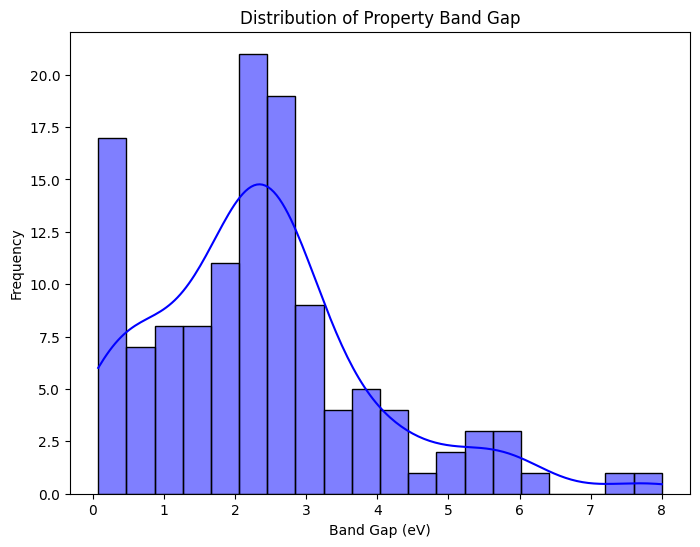

In [26]:
# Step 1: Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Property Band gap'], kde=True, bins=20, color='blue')
plt.title("Distribution of Property Band Gap")
plt.xlabel("Band Gap (eV)")
plt.ylabel("Frequency")
plt.savefig("band_gap_distribution.png")
plt.show()


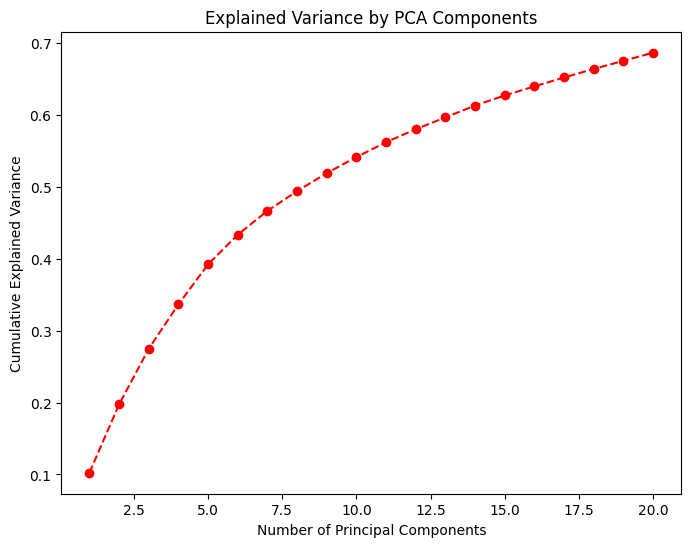

In [28]:
# Step 2: Scree Plot for PCA
plt.figure(figsize=(8, 6))
pca_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(pca_explained_variance) + 1), pca_explained_variance, marker='o', linestyle='--', color='red')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.savefig("pca_scree_plot.png")
plt.show()

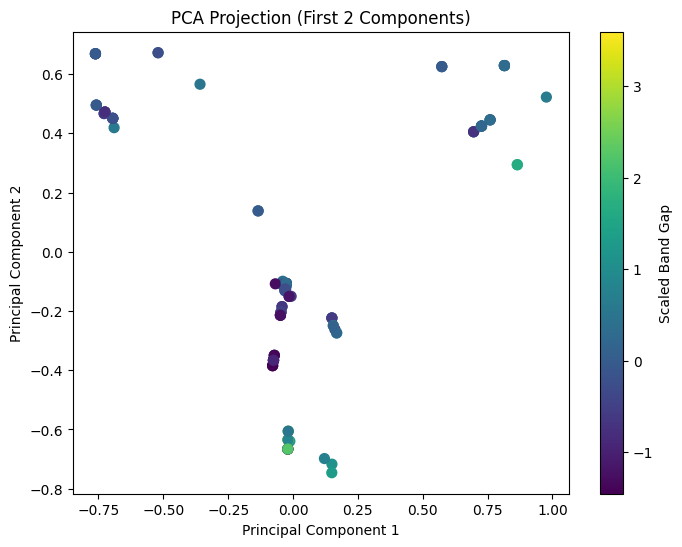

In [29]:
# Step 3: PCA Projection of(First 2 Components)
plt.figure(figsize=(8, 6))
pca_proj = pca.transform(X)
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], c=y, cmap='viridis', s=50)
plt.colorbar(label="Scaled Band Gap")
plt.title("PCA Projection (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("pca_projection.png")
plt.show()



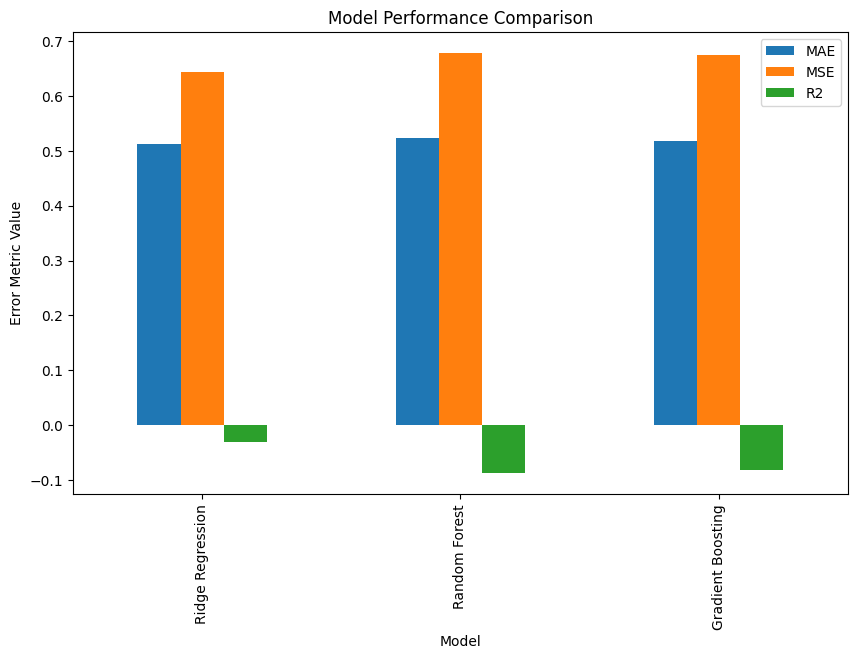

In [30]:
# Step 4: model performance comparison
results_df.set_index("Model", inplace=True)
results_df[["MAE", "MSE", "R2"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Error Metric Value")
plt.savefig("model_performance_comparison.png")
plt.show()

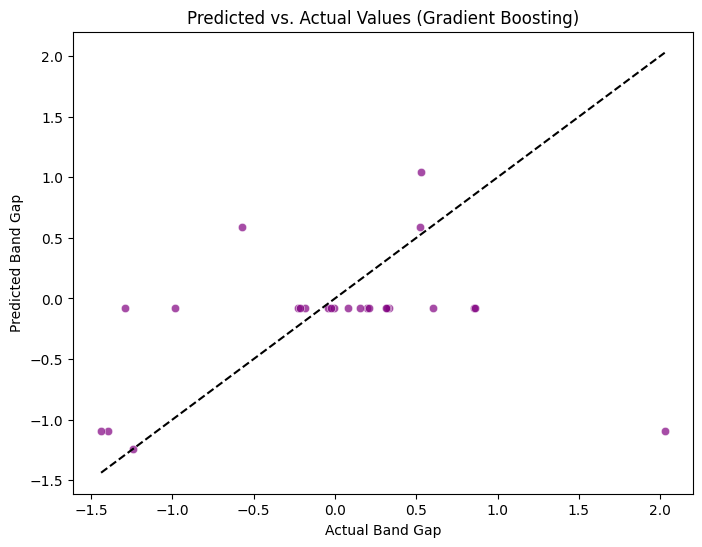

In [31]:
# Step 5: Predicted vs. Actual Plot (Best Model)
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.title("Predicted vs. Actual Values (Gradient Boosting)")
plt.xlabel("Actual Band Gap")
plt.ylabel("Predicted Band Gap")
plt.savefig("predicted_vs_actual.png")
plt.show()

# Quick Results Analysis:
1. Ridge Regression:

* MAE: 0.511, MSE: 0.643, R²: -0.031.
* Ridge Regression is slightly underperforming compared to a baseline mean predictor.

2. Random Forest:

* MAE: 0.523, MSE: 0.678, R²: -0.087.
* Slightly worse than Ridge Regression, likely due to the limited dataset size.

3. Gradient Boosting:

* MAE: 0.517, MSE: 0.675, R²: -0.082.
* Similar to Random Forest, indicating a weak relationship between features and the target.